<a href="https://colab.research.google.com/github/racheltu2020/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

from mpl_toolkits.mplot3d import Axes3D
import numpy as np

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
 def mvs_arr(arr):

  n = len(arr.T)
  mean = arr.T.sum()/n 
  variance = ((arr.T - mean)**2).sum()/(len(arr.T)-1)
  std_np = np.sqrt(variance)

  return mean, variance, std_np

# arr is column array
# check size 
# calculate its mean, variance, standard deviation 

In [0]:
arr = np.array([3505, 2400, 3027, 2798,3700, 3250, 2689])
mean_arr, var_arr, std_arr = mvs_arr(arr)

print('function return result of this column vector : \n')
print('mean value = ', mean_arr)
print('variance = ', var_arr)
print('standard deviation = ', std_arr)



####for verification usage
df_data = {'sales_1' : [3505, 2400, 3027, 2798,3700, 3250, 2689],
           'sales_2' : [127, 80, 105, 92, 120, 115, 93]}

df = pd.DataFrame(df_data)
df_mean = df.sales_1.mean()
df_var = df.sales_1.var()
df_std = df.sales_1.std()
print('\n')
print(df_mean, df_var, df_std)

function return result of this column vector : 

mean value =  3052.714285714286
variance =  214387.90476190473
standard deviation =  463.0204150595357


3052.714285714286 214387.90476190473 463.0204150595357


In [0]:
df['mean_1'] = df['sales_1'].mean()
df['mean_2'] = df['sales_2'].mean()
df['var_1'] = (df['sales_1'] - df['sales_1'].mean())**2
df['var_2'] = (df['sales_2'] - df['sales_2'].mean())**2

df['var_sales'] = df['var_1'].sum()/(len(df) - 1)
df['var_customer'] = df['var_2'].sum()/(len(df) - 1)

df['std_1'] = np.sqrt(df['var_1'].sum()/(len(df) - 1))
df['std_2'] = np.sqrt(df['var_2'].sum()/(len(df) - 1))
df

,sales_1,sales_2,mean_1,mean_2,var_1,var_2,var_sales,var_customer,std_1,std_2
0,3505,127,3052.714286,104.571429,204562.367347,503.040816,214387.904762,290.952381,463.020415,17.057326
1,2400,80,3052.714286,104.571429,426035.938776,603.755102,214387.904762,290.952381,463.020415,17.057326
2,3027,105,3052.714286,104.571429,661.224490,0.183673,214387.904762,290.952381,463.020415,17.057326
3,2798,92,3052.714286,104.571429,64879.367347,158.040816,214387.904762,290.952381,463.020415,17.057326
4,3700,120,3052.714286,104.571429,418978.795918,238.040816,214387.904762,290.952381,463.020415,17.057326
5,3250,115,3052.714286,104.571429,38921.653061,108.755102,214387.904762,290.952381,463.020415,17.057326
6,2689,93,3052.714286,104.571429,132288.081633,133.897959,214387.904762,290.952381,463.020415,17.057326


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
# df ready in previous block 

cov = ((df['sales_1'] - df['sales_1'].mean()) * (df['sales_2'] - df['sales_2'].mean())).sum()/(len(df) - 1 )

df['x_u_1'] = (df['sales_1'] - df['sales_1'].mean())
df['y_v_2'] = (df['sales_2'] - df['sales_2'].mean())
df['xy_mean_product'] = (df['sales_1'] - df['sales_1'].mean()) * (df['sales_2'] - df['sales_2'].mean())
cov_ = df['xy_mean_product'].sum() / (len(df) - 1)


print(cov, cov_)


# cov = 7604.357142857142
# population var = 214387.90
# customer var = 290.95

7604.357142857142 7604.357142857142


In [0]:
df_data = {'sales_1' : [3505, 2400, 3027, 2798,3700, 3250, 2689],
           'sales_2' : [127, 80, 105, 92, 120, 115, 93]}

df_ori = pd.DataFrame(df_data)
df_ori.cov()  
# match my previous calculation 7604.3571 for last week's sale(sales_1) and customers sale(sales_2)

,sales_1,sales_2
sales_1,214387.904762,7604.357143
sales_2,7604.357143,290.952381


In [0]:
df_ori.corr()

,sales_1,sales_2
sales_1,1.000000,0.962834
sales_2,0.962834,1.000000


In [0]:
# two ways to calculate covariance on previous work, done already

# based on sales_1 and sales_2, the ratio is around 29.19 
# sales_1 act as population, sales_2 act as saple

df['sales_1'].mean() / df['sales_2'].mean()

29.192622950819672

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
# std ration for sales_1 and sales_2 should close to it's mean value ration
# ratio calculated is close to its mean value's ration 
# cal_std_ratio = 27.14 , mean_value_ratio = 29.19
df['sales_1'].std() / df['sales_2'].std()

27.144958509898142

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
path_url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'

df = pd.read_csv(path_url, index_col = 0)
df.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


In [0]:
df.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

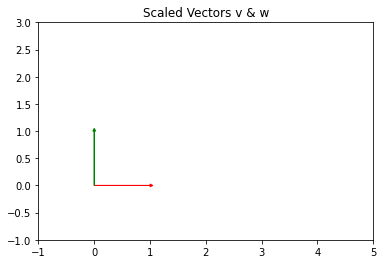

array([1, 0])

In [0]:
v = np.array([1, 0])
w = np.array([0, 1])

plt.arrow(0,0, v[0], v[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, w[0], w[1],head_width=.05, head_length=0.05, color ='green')

plt.xlim(-1,5)          
plt.ylim(-1,3)
plt.title("Scaled Vectors v & w")
plt.show()

# if two vector are othogonal, their dot product will be 0

np.dot(v, w)


## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
# nope, these two vectors only contain one column( as i_hat), 
# they are not othogonal to each other

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [79]:
c = np.array([2, -15, 6, 20])

# the first one is like length**2(magnitude of the vector)
c
c_norm_2 = np.linalg.norm(c)**2
c_dot_c = np.dot(c, c)
c_transpose_c = np.matmul(c.T, c)

print('c_norm_2 =', c_norm_2)
print('c_dot_c =', c_dot_c)
print('c_transpose_c =', c_transpose_c)

# they are the same meaning, since length is square root of vector SUM(each_element**2)
# as c.T multiply c
# as its norm**2

c_norm_2 = 665.0
c_dot_c = 665
c_transpose_c = 665


# Unit Vectors

In [80]:
c_unit = c / np.linalg.norm(c)

c_unit


array([ 0.07755667, -0.58167505,  0.23267002,  0.77556673])

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

Your text here
\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} +  11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} -8 \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} -8 \hat{j}
\end{align}


![alt text](https://)## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = np.array([4, 12, 11, 9, 2])
f_norm = np.linalg.norm(f)
f_unit = f/f_norm

print('unit vector of f: ', f_unit)
np.linalg.norm(f_unit)


unit vector of f:  [0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


0.9999999999999999

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

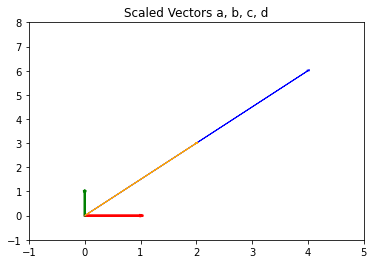

In [0]:
a = np.array([1, 0])
b = np.array([0, 1])
c = np.array([4, 6])
d = np.array([2, 3])

plt.arrow(0,0, a[0], a[1], head_width=.05, linewidth = 2, head_length=0.05, color ='red')
plt.arrow(0,0, b[0], b[1], head_width=.05, linewidth = 2, head_length=0.05, color ='green')
plt.arrow(0,0, c[0], c[1], head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, d[0], d[1], head_width=.05, head_length=0.05, color ='orange')
plt.xlim(-1,5)          
plt.ylim(-1,8)
plt.title("Scaled Vectors a, b, c, d")
plt.show()

# vector a, b is independent
# vector c, d is dependent

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

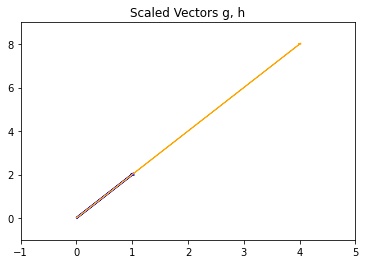

In [0]:
g = np.array([1, 2])
h = np.array([4, 8])

# they can also be denoted as :
# i, j is the unit vector along x-axis, y-axis

# g = 1*i + 2*j
# h = 4*i + 8*j

plt.arrow(0,0, g[0], g[1], head_width=.05, linewidth=2, head_length=0.05, color ='blue')
plt.arrow(0,0, h[0], h[1], head_width=.05, head_length=0.05, color ='orange')
plt.xlim(-1,5)          
plt.ylim(-1,9)
plt.title("Scaled Vectors g, h")
plt.show()



## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
# the derivation is following :
# it is R^3, the span is with 3 unit vector (i, j, k)

v = np.array([[1, 2, 3], [-1, 0, 7], [4, 8, 2]])
print(v.ndim)
v

2


array([[ 1,  2,  3],
       [-1,  0,  7],
       [ 4,  8,  2]])


####Following is the step by step derived result:


\begin{align}
  => \begin{bmatrix} 1&2&3 \\ -1&0&7 \\ 4&8&2 \end{bmatrix}
  => \begin{bmatrix} 1&2&3 \\ 0&2&10 \\ 2&4&1 \end{bmatrix}
  => \begin{bmatrix} 1&0&-7 \\ 0&1&5  \\ 0&0&-5\end{bmatrix}
  => \begin{bmatrix} 1&0&-7 \\ 0&1&0  \\ 0&1&0\end{bmatrix}
  => \begin{bmatrix} 1&0&-7 \\ 0&1&0  \\ 0&0&0\end{bmatrix}
\end{align}

*italicized text*

the span of l, m, n is R^2

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



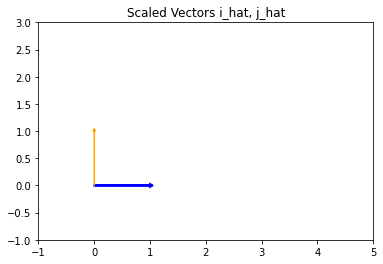

In [0]:
i_hat = np.array([1, 0])
j_hat = np.array([0, 1])

plt.arrow(0,0, i_hat[0], i_hat[1], head_width=.05, linewidth=2, head_length=0.05, color ='blue')
plt.arrow(0,0, j_hat[0], j_hat[1], head_width=.05, head_length=0.05, color ='orange')
plt.xlim(-1,5)          
plt.ylim(-1,3)
plt.title("Scaled Vectors i_hat, j_hat")
plt.show()
# i_hat, j_hat can form a 2 dimentional plane


## 6.2 What does it mean to form a basis?

In [0]:
# it means with its unique set of unit vectors, they can form a bais of  space V
# and this unique set of unit vectors are linear independent to each other

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
# Rank is 2 to form R^2 plane (2 dimentional plane). Derived above

## 7.2 What does the rank of a matrix tell us?

It takes number of m ranks to form a m dimentional space.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

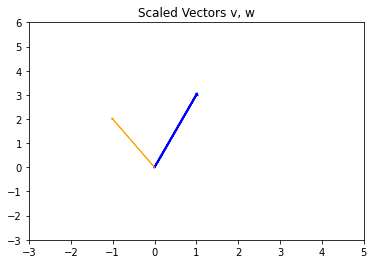

[-0.4472136   0.89442719]


In [0]:
v = np.array([1,3])
w = np.array([-1, 2])

j_w = (np.linalg.norm(w)**(-1) * w )

plt.arrow(0,0, v[0], v[1], head_width=.05, linewidth=2, head_length=0.05, color ='blue')
plt.arrow(0,0, w[0], w[1], head_width=.05, head_length=0.05, color ='orange')
plt.xlim(-3,5)          
plt.ylim(-3,6)
plt.title("Scaled Vectors v, w")
plt.show()
# 

print(j_w)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

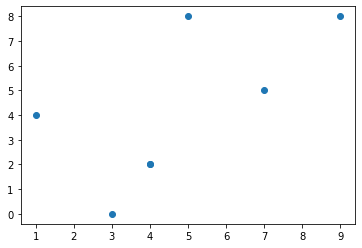

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()